In [20]:
import preamble

import apps.generic.dataset as dataset
import examples.dataset as dataset_tool

import pprint as pp
import pandas as pd

In [21]:
trial = "keySize_linear_1_10_suite_1"
df, spec = dataset.load(bucket="perfd", 
                  app_name="memcached",
                  trial=trial)
with pd.option_context('display.max_rows', None, 'display.max_columns',None):
    display(df.sort_values("avg_client_server_lat"))

,level_0,index,avg_lat_read,std_lat_read,min_lat_read,99th_lat_read,qps,rx_goodput,tx_goodput,numServerInstance,numClientInstance,serverInstanceType,clientInstanceType,keySize,valueSize,serverThread,clientThread,runTime,waitTime,warmupTime,debug,avg_client_server_lat,tenancy
172,172,172,69.1,14.8,45.3,80.1,14439.3,0.0,0.2,1,1,c5.xlarge,c5.xlarge,9,200,4,1,10,2,2,False,57.0,dedicated
87,87,87,71.0,11.2,54.8,82.1,14052.3,0.0,0.1,1,1,c5.xlarge,c5.xlarge,5,200,4,1,10,2,2,False,58.0,dedicated
98,98,98,70.6,13.0,54.8,81.5,14147.6,0.0,0.2,1,1,c5.xlarge,c5.xlarge,6,200,4,1,10,2,2,False,58.0,dedicated
100,100,100,70.0,9.2,49.8,80.2,14251.6,0.0,0.2,1,1,c5.xlarge,c5.xlarge,6,200,4,1,10,2,2,False,59.0,dedicated
159,159,159,68.8,14.2,45.3,80.1,14503.1,0.0,0.2,1,1,c5.xlarge,c5.xlarge,8,200,4,1,10,2,2,False,60.0,dedicated
56,56,56,69.0,13.2,49.8,80.0,14464.5,0.0,0.2,1,1,c5.xlarge,c5.xlarge,3,200,4,1,10,2,2,False,60.0,dedicated
89,89,89,67.7,9.0,45.3,79.8,14753.2,0.0,0.2,1,1,c5.xlarge,c5.xlarge,5,200,4,1,10,2,2,False,61.0,dedicated
5,5,5,70.5,13.3,54.8,81.5,14163.3,0.0,0.1,1,1,c5.xlarge,c5.xlarge,1,200,4,1,10,2,2,False,61.0,dedicated
10,10,10,68.8,11.0,49.8,80.0,14501.5,0.0,0.2,1,1,c5.xlarge,c5.xlarge,1,200,4,1,10,2,2,False,62.0,dedicated
169,169,169,68.6,12.1,49.8,79.9,14551.3,0.0,0.2,1,1,c5.xlarge,c5.xlarge,9,200,4,1,10,2,2,False,62.0,dedicated


### Predicting Avg. Read Latency

adding new figure: Figure(1440x576)

Table 1
rRMSE over raw JCTs
+-----------+-----+-----+-----+-----+-------+-----+------+--------+-------+
|   False   |  lr | knn |  rf | svm | svm_k |  nn | best | oracle | naive |
+-----------+-----+-----+-----+-----+-------+-----+------+--------+-------+
| memcached | 2.1 | 2.0 | 2.0 | 2.1 |  2.1  | 2.1 | 2.0  |  1.9   |  2.1  |
+-----------+-----+-----+-----+-----+-------+-----+------+--------+-------+
*: best refers to the best score among the models

Oracle score distribution on the complete dataset
+--------------+-----+-----+-----+-----+-----+-----+-----+-----+-----+------+
| App/RMSRE(%) | 1.0 | 2.0 | 3.0 | 4.0 | 5.0 | 6.0 | 7.0 | 8.0 | 9.0 | 10.0 |
+--------------+-----+-----+-----+-----+-----+-----+-----+-----+-----+------+
|  memcached   | 1.1 | 1.3 | 0.9 | 1.5 | 0.7 | 1.2 | 0.9 | 0.8 | 1.7 | 5.0  |
+--------------+-----+-----+-----+-----+-----+-----+-----+-----+-----+------+


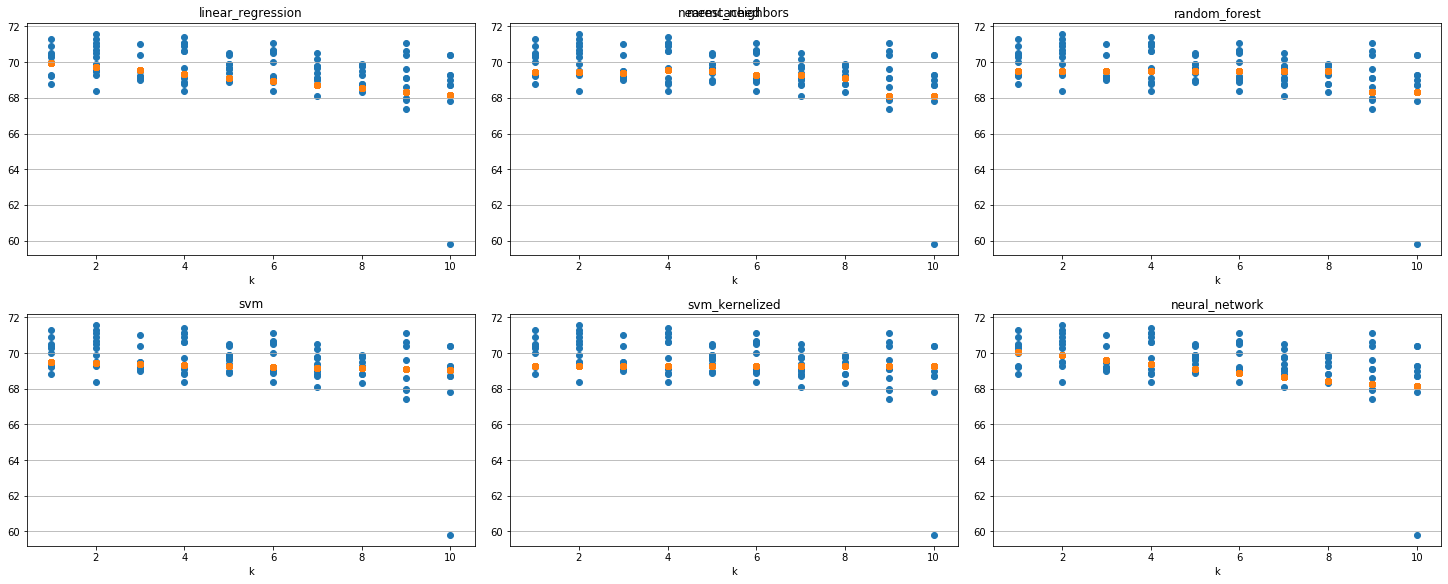

In [22]:
ctx = dataset_tool.default_ctx()
ctx["exp_name"] = trial
ctx["app_name"] = "memcached"
ctx["feature"] = ctx["feature_mode"] = ["keySize"]
ctx["target_feature"] = "avg_lat_read"
ctx["testset_ratio"] = 0.5
ctx["retune"] = False
results = dataset_tool.best_case_eval(ctx, {"memcached": df})

### Predicting TX Goodput

In [25]:
ctx = dataset_tool.default_ctx()
ctx["exp_name"] = trial
ctx["app_name"] = "memcached"
ctx["feature"] = ctx["feature_mode"] = ["keySize"]
ctx["target_feature"] = "qps"
ctx["testset_ratio"] = 0.5
ctx["retune"] = False

hyptertune: start tuning..
(99, 1) (99,)
Search took 1.40 seconds parameter settings.
Model with rank: 1
Mean validation score: -8.396 (std: 3.262)
Parameters: {'fit_intercept': False, 'normalize': True}

[('linear_regression', {'fit_intercept': False, 'normalize': True})]
hyptertune: took 1 s
hyptertune: start tuning..
(99, 1) (99,)
Search took 1.19 seconds parameter settings.
Model with rank: 1
Mean validation score: -8.253 (std: 1.233)
Parameters: {'algorithm': 'auto', 'n_neighbors': 32, 'weights': 'uniform'}

[('nearest_neighbors', {'algorithm': 'auto', 'n_neighbors': 32, 'weights': 'uniform'})]
hyptertune: took 1 s
hyptertune: start tuning..
(99, 1) (99,)
Search took 5.54 seconds parameter settings.
Model with rank: 1
Mean validation score: -5.777 (std: 4.112)
Parameters: {'bootstrap': True, 'max_depth': 1, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 1}

[('random_forest', {'bootstrap': True, 'max_depth': 1, 'max_features': 'sqrt', 'min_

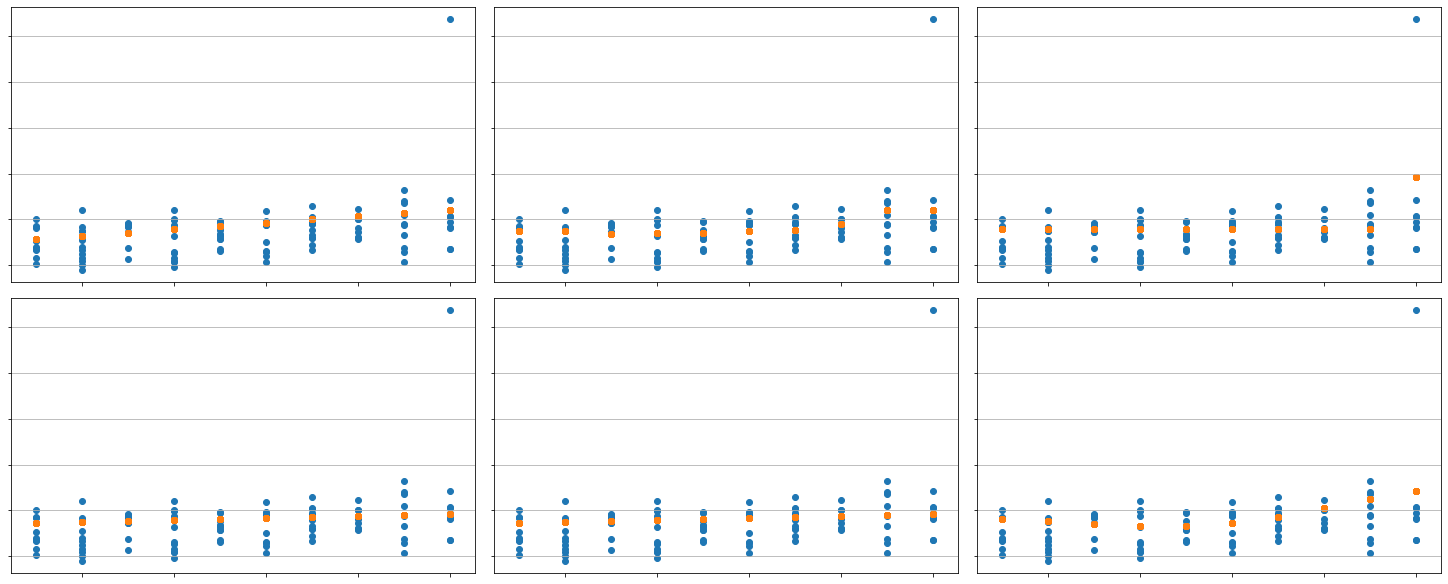

In [26]:
results = dataset_tool.best_case_eval(ctx, {"memcached": df})